In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

C:\Users\miles\AppData\Local\Temp\ipykernel_22108\668024253.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# import data
df = pd.read_csv('Data_boats.csv')

Some basic eda

In [3]:
# inspect data
df.head()

,RESPID,Q1.1,Q1.2,Q1.3,Q1.4,Q1.5,Q1.6,Q1.7,Q1.8,Q1.9,...,Q16.20,Q16.21,Q16.22,Q16.23,Q16.24,Q16.25,Q16.26,Q16.27,Q17,Q18
0,23822,5,1,5,5,5,5,5,3,5,...,4,4,4,4,5,4,4,4,0,1
1,224795,3,2,4,4,4,4,5,3,4,...,4,3,3,4,3,3,3,3,1,1
2,20952,3,1,4,4,5,4,4,2,4,...,5,3,3,5,2,4,3,5,1,0
3,5612,5,2,3,4,5,5,3,3,3,...,4,4,4,4,2,5,5,4,1,0
4,15016,4,2,4,5,5,4,5,4,5,...,4,4,5,5,3,4,5,4,0,0


In [4]:
# Basic EDA
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")
print(f"Missing values: {df.isna().sum().sum()}")
print(f"Duplicated rows: {df.duplicated().sum()}")

Rows: 2813
Columns: 82
Missing values: 0
Duplicated rows: 0


In [5]:
# inspecting data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2813 entries, 0 to 2812
Data columns (total 82 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   RESPID      2813 non-null   int64
 1   Q1.1        2813 non-null   int64
 2   Q1.2        2813 non-null   int64
 3   Q1.3        2813 non-null   int64
 4   Q1.4        2813 non-null   int64
 5   Q1.5        2813 non-null   int64
 6   Q1.6        2813 non-null   int64
 7   Q1.7        2813 non-null   int64
 8   Q1.8        2813 non-null   int64
 9   Q1.9        2813 non-null   int64
 10  Q1.10       2813 non-null   int64
 11  Q1.11       2813 non-null   int64
 12  Q1.12       2813 non-null   int64
 13  Q1.13       2813 non-null   int64
 14  Q1.14       2813 non-null   int64
 15  Q1.15       2813 non-null   int64
 16  Q1.16       2813 non-null   int64
 17  Q1.17       2813 non-null   int64
 18  Q1.18       2813 non-null   int64
 19  Q1.19       2813 non-null   int64
 20  Q1.20       2813 non-null   in

In [6]:
#first i will index respid in original df
new_df = df.set_index(df.columns[0])

# Check the answers to Q.1 of the survey. In particular, create a correlation matrix of the answers to the 29 questions and discuss (i) whether there are any high correlations, and (ii) what these correlations imply.

In [7]:
# Create a list of columns containing 'Q1' in their names
q1_columns = [col for col in df.columns if 'Q1.' in col]

# Create a new DataFrame with only the selected columns
df_Q1 = df[q1_columns]

In [8]:
df_Q1.head()

,Q1.1,Q1.2,Q1.3,Q1.4,Q1.5,Q1.6,Q1.7,Q1.8,Q1.9,Q1.10,...,Q1.20,Q1.21,Q1.22,Q1.23,Q1.24,Q1.25,Q1.26,Q1.27,Q1.28,Q1.29
0,5,1,5,5,5,5,5,3,5,4,...,4,5,5,5,5,5,5,3,4,5
1,3,2,4,4,4,4,5,3,4,4,...,3,4,4,3,4,4,4,4,4,4
2,3,1,4,4,5,4,4,2,4,3,...,3,3,5,4,4,4,5,3,3,4
3,5,2,3,4,5,5,3,3,3,4,...,3,5,4,5,3,5,4,3,3,5
4,4,2,4,5,5,4,5,4,5,4,...,4,4,4,5,4,4,5,4,4,4


In [9]:
df_Q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2813 entries, 0 to 2812
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Q1.1    2813 non-null   int64
 1   Q1.2    2813 non-null   int64
 2   Q1.3    2813 non-null   int64
 3   Q1.4    2813 non-null   int64
 4   Q1.5    2813 non-null   int64
 5   Q1.6    2813 non-null   int64
 6   Q1.7    2813 non-null   int64
 7   Q1.8    2813 non-null   int64
 8   Q1.9    2813 non-null   int64
 9   Q1.10   2813 non-null   int64
 10  Q1.11   2813 non-null   int64
 11  Q1.12   2813 non-null   int64
 12  Q1.13   2813 non-null   int64
 13  Q1.14   2813 non-null   int64
 14  Q1.15   2813 non-null   int64
 15  Q1.16   2813 non-null   int64
 16  Q1.17   2813 non-null   int64
 17  Q1.18   2813 non-null   int64
 18  Q1.19   2813 non-null   int64
 19  Q1.20   2813 non-null   int64
 20  Q1.21   2813 non-null   int64
 21  Q1.22   2813 non-null   int64
 22  Q1.23   2813 non-null   int64
 23  Q1.24   2813 

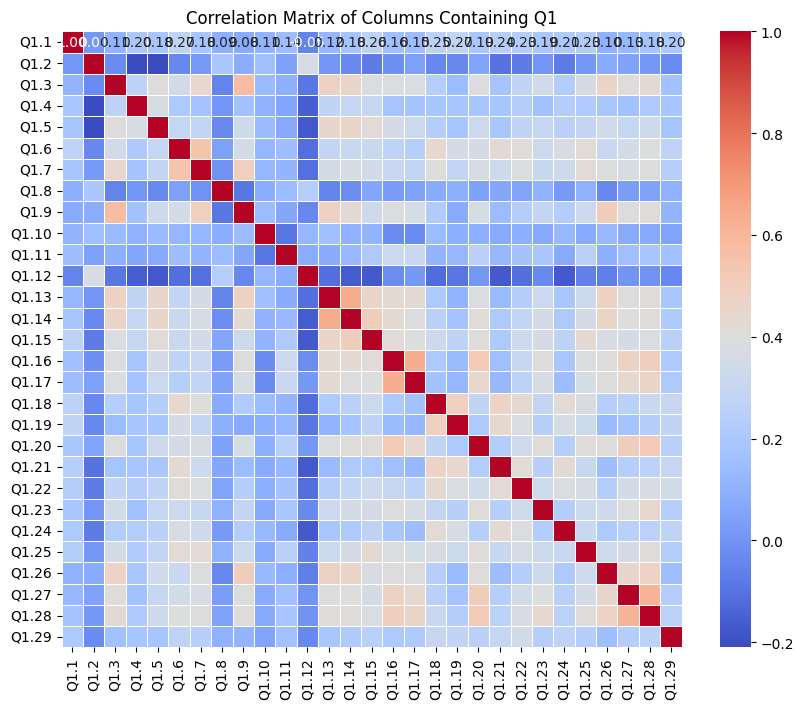

In [10]:
#looking at the correlation of answers
correlation_matrix = df_Q1.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Columns Containing Q1')
plt.show()

In [11]:
#looking at all highly correlated columns
for column1 in correlation_matrix.columns:
    for column2 in correlation_matrix.columns:
        if column1 != column2 and correlation_matrix.loc[column1, column2] > 0.6:
            print(f"Correlation between {column1} and {column2}: {correlation_matrix.loc[column1, column2]}")


Correlation between Q1.13 and Q1.14: 0.6381520144503627
Correlation between Q1.14 and Q1.13: 0.6381520144503627
Correlation between Q1.16 and Q1.17: 0.6314320645596128
Correlation between Q1.17 and Q1.16: 0.6314320645596128
Correlation between Q1.27 and Q1.28: 0.6153206658179295
Correlation between Q1.28 and Q1.27: 0.6153206658179295


The questions that are highly correlated are 13 and 14, 16 and 17, and 27 and 28.

13 and 14:
These questions ask about when buying a boat and when buying accessories do they buy the latest and greatest. This would make sense as it shows that customers want consistent in their accessories and boats, whethere they want the latest and greatest of both or if it doesnt matter to them for both.

16 and 17:
These questions ask about other's perspective of one's boating knowledge and one's perspective of their own boating knowledge.This correlation suggests that external and internal perspective of boating knowledge is consistent and more than likely true if both others and the individual agree.

27 and 28:
These questions ask about spare time and passion in life. This correlation implies that if boating takes up the majority of one's spare time then that means its their passion in life and if it doesn't take up the majority of ones spare time then it is likely not their passion.

# Can you simplify the analysis by reducing the number of features in the data, especially regarding Q.1? You could use Principle Component Analysis or some other technique to reduce the dimensionality.

In [12]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_Q1)

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Transform the data to principal components
principal_components = pca.transform(scaled_data)

# Convert to DataFrame for better visualization
principal_df = pd.DataFrame(data=principal_components, columns=[f"PC{i}" for i in range(1, pca.n_components_ + 1)])

# Print explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Print the principal components DataFrame
print(principal_df.head())


Explained Variance Ratio: [0.29077888 0.08046933 0.06423316 0.0502622  0.04163343 0.03097634
 0.02816456 0.0271151  0.02691192 0.02556287 0.02367698 0.02253896
 0.02234277 0.02130956 0.0210026  0.01987863 0.01936878 0.01850035
 0.01807308 0.01762793 0.01722417 0.01686337 0.01588518 0.01572292
 0.01420314 0.01322806 0.01275853 0.01215256 0.01153463]
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -6.235206 -0.724955 -3.254736 -0.853675  0.449720  0.152320 -0.258735   
1 -2.023768  0.918216 -2.002382 -1.251309 -0.616307  0.071664  0.761538   
2 -2.460775  2.440444 -3.828346 -0.007580 -0.156853 -0.187389  0.185117   
3 -3.017727 -0.016058 -1.501096  0.614378  1.636995  0.805541 -0.946564   
4 -5.120355  1.561155 -1.406230  0.667618  0.747636  0.635381  0.574160   

        PC8       PC9      PC10  ...      PC20      PC21      PC22      PC23  \
0  0.264517 -0.525522 -0.529053  ...  0.217631 -0.122579  0.320928 -0.961994   
1  0.256209 -0.411057  0.498146  ...  

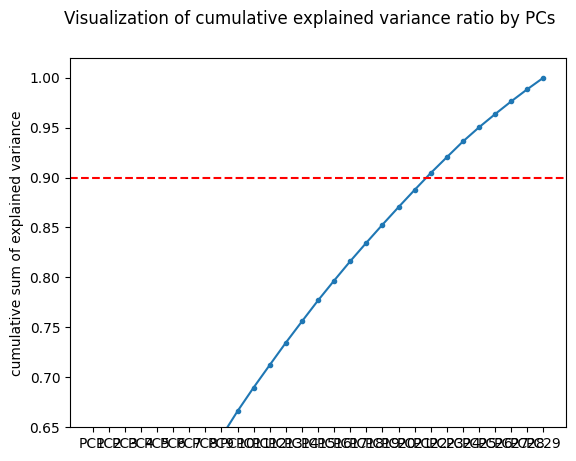

In [13]:
# Visualizing - either, or

plt.suptitle("Visualization of cumulative explained variance ratio by PCs")

# scree plot - visualizing cumulative variance captured
plt.plot(principal_df.columns, pca.explained_variance_ratio_.cumsum(), marker='.')
plt.axhline(0.9, color='red', linestyle='--')
plt.ylim(0.65, 1.02)
plt.ylabel('cumulative sum of explained variance')

plt.show()

In [14]:
#using eigenvalues method
eigenvalues = pca.explained_variance_
components_with_eigenvalues_gt_1 = sum(eigenvalues > 1)

In [15]:
components_with_eigenvalues_gt_1

5

In [16]:
# Choose the number of components to keep
n_components_to_keep = 5

# Keep only the top N principal components
reduced_principal_df = principal_df.iloc[:, :n_components_to_keep]

# Print the reduced principal components DataFrame
print(reduced_principal_df)

            PC1       PC2       PC3       PC4       PC5
0     -6.235206 -0.724955 -3.254736 -0.853675  0.449720
1     -2.023768  0.918216 -2.002382 -1.251309 -0.616307
2     -2.460775  2.440444 -3.828346 -0.007580 -0.156853
3     -3.017727 -0.016058 -1.501096  0.614378  1.636995
4     -5.120355  1.561155 -1.406230  0.667618  0.747636
...         ...       ...       ...       ...       ...
2808  -2.817975 -0.723717 -3.011644  1.161773 -2.539306
2809  11.235658  5.572047 -1.470052  2.929603 -2.910009
2810   1.400172  3.116233 -0.253848 -0.232772 -0.657675
2811   0.868877  2.404331 -0.258254  1.306820  1.040948
2812   6.091891  0.876802  3.978310 -2.360370  0.412368

[2813 rows x 5 columns]


Above is my reduced pca df for question 1.

# Use the customers' survey answers (your reduced version of Q.1 and the answers to Q.2-Q.16) to derive customer segments using Python. You can use any clustering algorithm. Make sure to specify the number of clusters you pick and justify your choice.

In [17]:
new_df.iloc[:,29:-2]

,Q2,Q2.Cluster,Q3,Q4,Q5,Q6,Q7.1,Q7.2,Q7.3,Q7.4,...,Q16.18,Q16.19,Q16.20,Q16.21,Q16.22,Q16.23,Q16.24,Q16.25,Q16.26,Q16.27
RESPID,,,,,,,,,,,,,,,,,,,,,
23822,1,1,4,11,6,90,2,3,3,3,...,4,4,4,4,4,4,5,4,4,4
224795,1,1,4,3,8,25,2,5,4,5,...,4,3,4,3,3,4,3,3,3,3
20952,1,1,5,5,8,21,1,2,4,4,...,4,5,5,3,3,5,2,4,3,5
5612,1,1,4,6,8,22,3,4,3,4,...,5,4,4,4,4,4,2,5,5,4
15016,1,1,4,5,8,24,1,4,3,3,...,4,4,4,4,5,5,3,4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485225,3,1,5,3,1,16,2,4,3,4,...,5,5,5,5,3,4,4,3,4,4
484245,1,1,2,4,1,19,1,3,5,5,...,4,4,3,4,3,3,4,2,4,4
224990,1,1,4,4,1,20,3,4,3,3,...,3,3,3,4,3,3,2,3,3,3


In [18]:
#combining reduced question 1 with Q2 to 16
# Concatenate principal_df with the remaining columns of the original DataFrame
combined_df = pd.concat([reduced_principal_df, new_df.iloc[:, 29:-2].reset_index(drop=True)], axis=1)

# Print the combined DataFrame
print(combined_df)

            PC1       PC2       PC3       PC4       PC5  Q2  Q2.Cluster  Q3  \
0     -6.235206 -0.724955 -3.254736 -0.853675  0.449720   1           1   4   
1     -2.023768  0.918216 -2.002382 -1.251309 -0.616307   1           1   4   
2     -2.460775  2.440444 -3.828346 -0.007580 -0.156853   1           1   5   
3     -3.017727 -0.016058 -1.501096  0.614378  1.636995   1           1   4   
4     -5.120355  1.561155 -1.406230  0.667618  0.747636   1           1   4   
...         ...       ...       ...       ...       ...  ..         ...  ..   
2808  -2.817975 -0.723717 -3.011644  1.161773 -2.539306   3           1   5   
2809  11.235658  5.572047 -1.470052  2.929603 -2.910009   1           1   2   
2810   1.400172  3.116233 -0.253848 -0.232772 -0.657675   1           1   4   
2811   0.868877  2.404331 -0.258254  1.306820  1.040948   0           0   4   
2812   6.091891  0.876802  3.978310 -2.360370  0.412368   0           0   4   

      Q4  Q5  ...  Q16.18  Q16.19  Q16.20  Q16.21  

In [19]:
#Scaling combined df 
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_df)

combined_scaled = pd.DataFrame(scaled_data ,columns = combined_df.columns,index = combined_df.index)

# Print the combined DataFrame
print(combined_scaled)

           PC1       PC2       PC3       PC4       PC5        Q2  Q2.Cluster  \
0    -2.147189 -0.474566 -2.384719 -0.707087  0.409282  0.125422    0.587613   
1    -0.696916  0.601078 -1.467129 -1.036441 -0.560889  0.125422    0.587613   
2    -0.847406  1.597551 -2.804998 -0.006278 -0.142749  0.125422    0.587613   
3    -1.039201 -0.010512 -1.099841  0.508881  1.489798  0.125422    0.587613   
4    -1.763273  1.021955 -1.030333  0.552979  0.680409  0.125422    0.587613   
...        ...       ...       ...       ...       ...       ...         ...   
2808 -0.970413 -0.473756 -2.206607  0.962280 -2.310973  2.663630    0.587613   
2809  3.869173  3.647544 -1.077095  2.426549 -2.648343  0.125422    0.587613   
2810  0.482171  2.039932 -0.185992 -0.192801 -0.598537  0.125422    0.587613   
2811  0.299211  1.573910 -0.189221  1.082421  0.947347 -1.143683   -1.701800   
2812  2.097837  0.573967  2.914875 -1.955061  0.375288 -1.143683   -1.701800   

            Q3        Q4        Q5  ...

In [20]:
from sklearn.cluster import KMeans

# ks

ks = np.arange(1,10)

intertia = []

for k in ks:
    
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(combined_scaled)
    
    intertia.append(kmeans.inertia_)

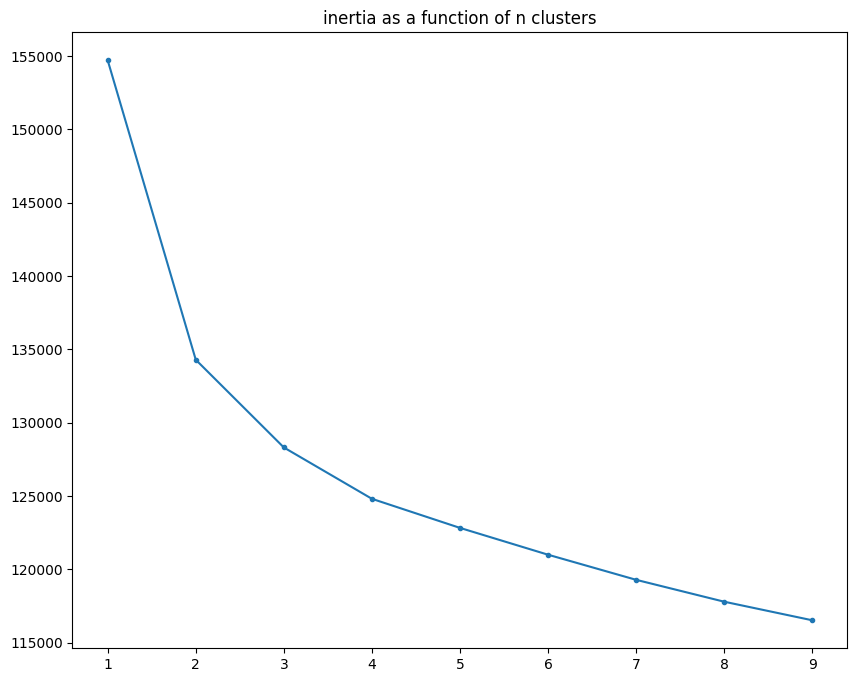

In [21]:
# let's plot inertia against the number of clusters

plt.figure(figsize = (10,8))
plt.plot(ks,intertia,marker = ".")
plt.title('inertia as a function of n clusters')
plt.show()

using the elbow method we can say that 2 looks pretty good,

In [22]:
from sklearn.metrics import silhouette_score

ks = np.arange(2,10)

sil_scores = []

for k in ks:
    
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(combined_scaled)    
    sil_scores.append(silhouette_score(combined_scaled,kmeans.labels_))
    
    
    

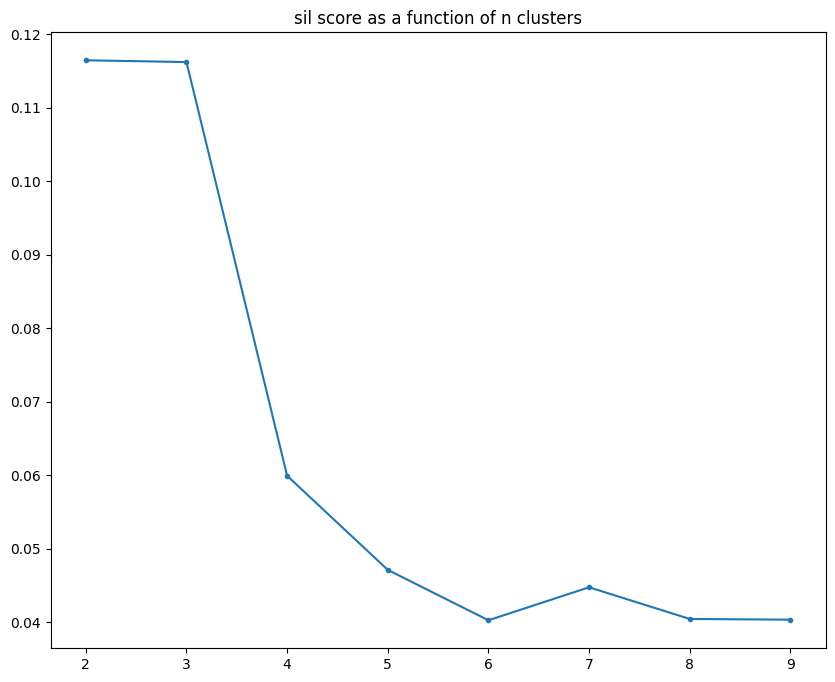

In [23]:
# plot 

plt.figure(figsize = (10,8))
plt.plot(ks,sil_scores,marker = ".")
plt.title('sil score as a function of n clusters')
plt.show()

number of clusters based on sil score and inertia is 2. as in the sil score 2 is the highest and inertia using elbow method 2 is the turning point.

In [35]:
# we settle on k = 2

my_kmeans = KMeans(n_clusters = 2,random_state=21)
my_kmeans.fit(combined_scaled)

KMeans(n_clusters=2, random_state=21)

# Create a profile of your clusters (customer segments) using the survey answers.

In [36]:
# attach the cluster labels to original df 

new_df['kmeans'] = my_kmeans.labels_

In [37]:
pd.set_option('display.max_rows', None)   # Show all rows
pd.set_option('display.max_columns', None)   # Show all columns
print(new_df.groupby("kmeans").mean().T)

kmeans              0          1
Q1.1         4.181747   3.899412
Q1.2         2.892356   2.881123
Q1.3         3.514821   2.781189
Q1.4         4.114665   3.702809
Q1.5         3.862715   3.292619
Q1.6         4.226209   3.726976
Q1.7         3.996880   3.404311
Q1.8         3.794072   3.689745
Q1.9         3.258190   2.574788
Q1.10        3.482839   3.269758
Q1.11        3.631825   3.318746
Q1.12        2.808892   2.894840
Q1.13        3.411856   2.697583
Q1.14        3.620125   2.932071
Q1.15        3.955538   3.355323
Q1.16        3.440718   2.817113
Q1.17        3.386115   2.832789
Q1.18        4.353354   3.928152
Q1.19        4.388456   4.042456
Q1.20        3.479719   2.887655
Q1.21        4.432137   4.096669
Q1.22        4.234789   3.820379
Q1.23        3.865055   3.310908
Q1.24        4.336973   3.917701
Q1.25        4.099064   3.532985
Q1.26        3.301872   2.649249
Q1.27        3.511700   2.858263
Q1.28        3.685647   2.993468
Q1.29        4.193448   3.893534
Q2        

Q1:
Group 0 on average agrees more with Q1 questions (Group 0 mean > Group 1 mean for answers) than group 1 which indicates they have more enthusiasm fo boating based on the qay Q1 questions are formed.

Q2:
similiar

Q3:
Group 0 more likely to buy new boat than group 0

Q4:
Group 0 willing to pay more

Q5:
Group 0 wants more horsepower

Q6:
Group 0 wants longer boat

Q7-9: similiar

Q10: 
Group 0 boats more days

Q11-14: similiar

Q16:
Group 0 is significantly more happy with the brand

Group 0 is a cluster representing individuals that are more passionate about boating and want high quality more expensive boats while group 1 is still passionate boaters but are less enthusiatic and would settle for smaller less advanced boats. Group 0 also enjoys the brdand in question more than group 1.

# Based on the segments you identify (and their likelihood of recommending and buying from CreeqBoat - Q.17 and Q.18 in the survey), what can you recommend CreeqBoat regarding the customer segments to target and the types of targeted boats to build?

Based on the answers to q17, the more passionate boaters Group 0 that favour the brand are much more likely to reccomend CreeqBoat than Group 1.

Based on q18, interestingly Group 1 is slighly more likely to buy a Creeqboat in the future, if they were buying a new boat all over again.

Since the difference is small between 0 and 1 for buying a CreeqBoat and that group 0 is much more likely to recommend to their friends, I would recommend targeting group 0. Based on the data, if Creeq built boats with more horsepower, longer bows and instill the same brand qualities they would be able to capture a greater share of Group 0. This can be very beneficial to the company because Group 0 is more likely to buy a new boat in the future and more willing to spend more money. 